In [10]:
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

# Flux

In [11]:
data_antinu = np.loadtxt('flux-dune-antinu-FD.txt')
Flux = np.transpose(data_antinu)

flux_nue = Flux[1]
flux_numu = Flux[2]
flux_nuebar = Flux[4]
flux_numubar = Flux[5]
energy_in = Flux[0]

flux_nue_neg = interp1d(energy_in,flux_nue)
flux_numu_neg = interp1d(energy_in,flux_numu)
flux_nuebar_neg = interp1d(energy_in,flux_nuebar)
flux_numubar_neg = interp1d(energy_in,flux_numubar)

#fluxo neutrino far detector

X2 = np.loadtxt('flux-dune-nu-FD.txt')
Flux = np.transpose(X2)

flux_nue = Flux[1]
flux_numu = Flux[2]
flux_nuebar = Flux[4]
flux_numubar = Flux[5]


energy_in = Flux[0]
flux_nue_pos = interp1d(energy_in,flux_nue)
flux_numu_pos = interp1d(energy_in,flux_numu)
flux_nuebar_pos = interp1d(energy_in,flux_nuebar)
flux_numubar_pos = interp1d(energy_in,flux_numubar)

# Cross-section

In [12]:
df = pd.read_csv('xsec_cc.dat', delimiter=" ", header=None)
energy_in =10**df[0]
nue = df[1]/energy_in
numu = df[2]/energy_in
nuae = df[4]/energy_in
nuamu = df[5]/energy_in

xsec_nue = interp1d(energy_in,nue)
xsec_numu = interp1d(energy_in,numu)
xsec_nuebar = interp1d(energy_in,nuae)
xsec_numubar = interp1d(energy_in,nuamu)

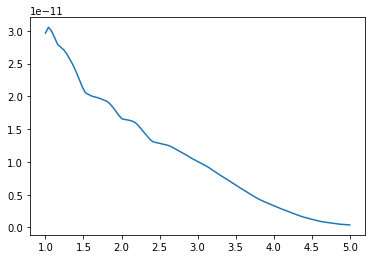

In [13]:
E_test = np.linspace(1,5,100)

plt.plot(E_test, flux_numu_pos(E_test)*xsec_numu(E_test))

In [14]:
import nina

In [27]:
class NonOsc(nina.Prob):
    def func(self, energy):
        prob = energy/energy
        return prob

class Prob2nu(nina.Prob):
    def func(self, energy):
        return 1-self.params[0]*np.sin(2.16*self.params[1]*self.L/energy)**2

In [30]:
#prob = NonOsc([], 1.3)
prob = Prob2nu([0.5,2.5*10**-3], 1.3)

detector = nina.Detector( xsec = xsec_numu, position = [0,0,0] )
source = nina.Source( flux = flux_numu_pos, position = [1.3,0,0] )
histogram = nina.Histogram.getUniform(0.5,8,30)

numu_pos = nina.Signal( detector, source, prob, histogram, norm=4010229771119106.0)
numu_pos.norm = 1
numu_pos_events = numu_pos.simulate()

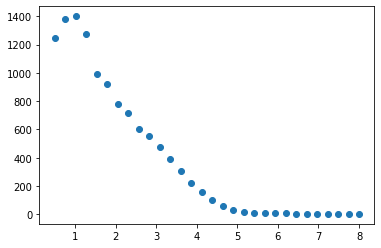

In [31]:
plt.scatter(np.linspace(0.5,8,30),numu_pos_events*4010229771119106.0)